# Initialize Project Ecommerce Lite

In [23]:
import pandas as pd

# Read the data
data = pd.read_csv('ecommerce_lite.csv')

# Print the first five rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,572300,22423,REGENCY CAKESTAND 3 TIER,2.0,10/23/2011 14:40,12.75,18005.0,United Kingdom
1,568984,22505,MEMO BOARD COTTAGE DESIGN,1.0,9/29/2011 15:57,4.95,17813.0,United Kingdom
2,573333,84997D,CHILDRENS CUTLERY POLKADOT PINK,4.0,10/30/2011 11:34,4.15,12483.0,Sweden
3,551988,22673,FRENCH GARDEN SIGN BLUE METAL,12.0,5/5/2011 15:08,1.25,12576.0,Poland
4,572070,21137,BLACK RECORD COVER FRAME,24.0,10/20/2011 13:37,3.39,15587.0,United Kingdom


### Mean, Median and Modous based on Quantity

In [5]:
mean_qty = data['Quantity'].mean()
print(f'Mean quantity: {mean_qty:.2f}')

median_qty = data['Quantity'].median()
print(f'Median quantity: {median_qty:.2f}')

mode_qty = data['Quantity'].mode()
print(f'Mode quantity: {mode_qty[0]}')

Mean quantity: 12.58
Median quantity: 6.00
Mode quantity: 1.0


### Q1, Q2, Q3 and IQR based on Quantity

In [7]:
import numpy as np

q1 = np.percentile(data['Quantity'], 25)
print(f'First quartile (Q1): {q1:.2f}')

q2 = np.percentile(data['Quantity'], 50)
print(f'Second quartile (Q2): {q2:.2f}')

q3 = np.percentile(data['Quantity'], 75)
print(f'Third quartile (Q3): {q3:.2f}')

IQR = q3 - q1 
print(f'Interquartile range (IQR): {IQR:.2f}')

First quartile (Q1): 2.00
Second quartile (Q2): 6.00
Third quartile (Q3): 12.00
Interquartile range (IQR): 10.00


### Identifying Outliers

In [8]:
batas_bawah = q1 - 1.5 * IQR
batas_atas = q3 + 1.5 * IQR

print(f'Batas bawah: {batas_bawah:.2f}')
print(f'Batas atas: {batas_atas:.2f}')

outliers = data[(data['Quantity'] < batas_bawah) | (data['Quantity'] > batas_atas)]
print(f'Jumlah outliers: {len(outliers)}')

Batas bawah: -13.00
Batas atas: 27.00
Jumlah outliers: 2512


### Generate Histogram

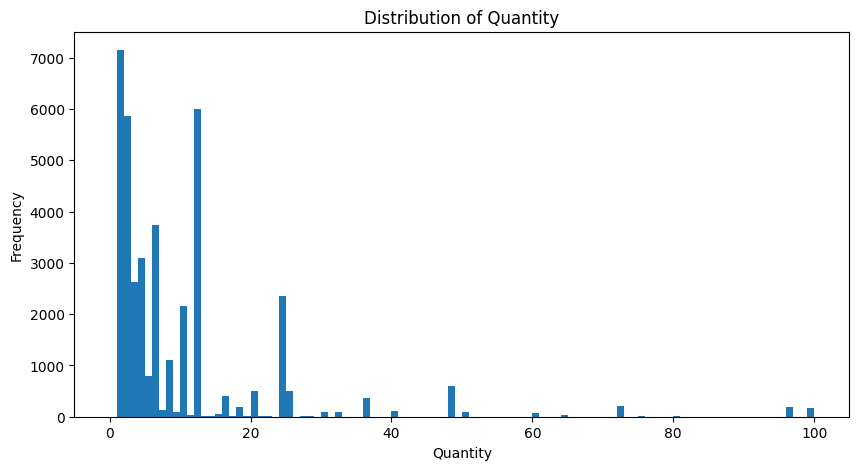

In [21]:
import matplotlib.pyplot as plt

# Create Histogram
plt.figure(figsize=(10, 5))
plt.hist(data['Quantity'], bins=100, range=(0, 100))
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

# Visualisasi Data

### Total Sales for Stock Code = '2243' for each country

Country
Australia          32.0
Belgium             3.0
EIRE               33.0
France             34.0
Germany           105.0
Greece             16.0
Norway              4.0
United Kingdom    861.0
Name: Quantity, dtype: float64


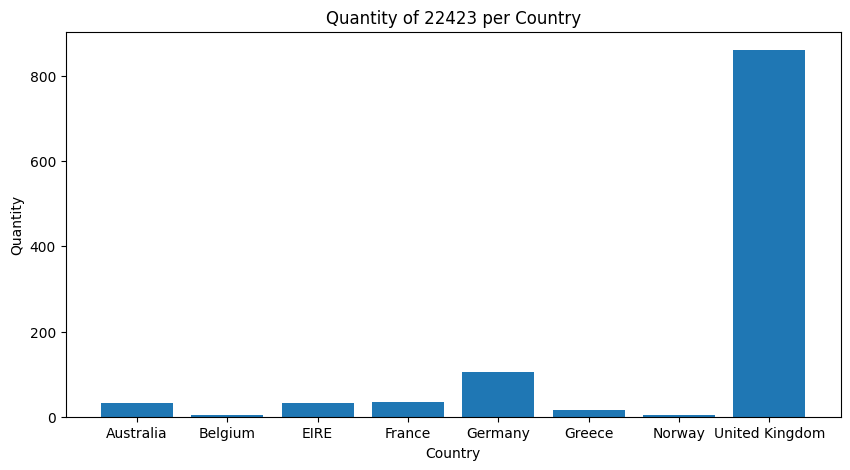

In [30]:
import matplotlib.pyplot as plt

data_22423 = data.loc[data['StockCode'] == '22423']

data_22423_country = data_22423.groupby('Country')['Quantity'].sum()

print(data_22423_country)

plt.figure(figsize=(10, 5))
plt.bar(data_22423_country.index, data_22423_country.values)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Quantity of 22423 per Country')
plt.show()

### Percentage Sales for StockCode = '2243' for each country

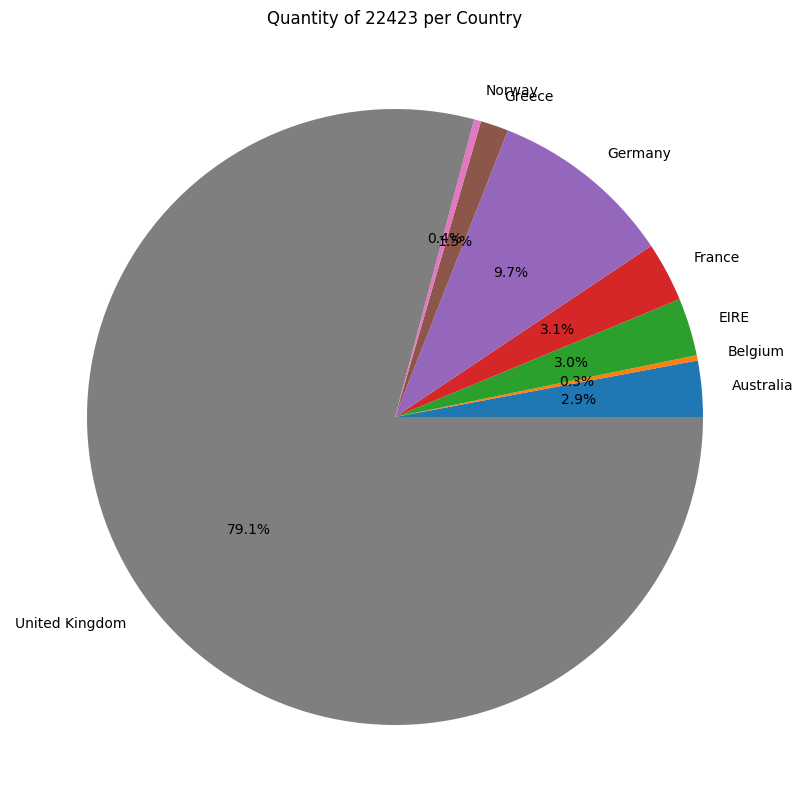

In [31]:
# Generate pie chart
plt.figure(figsize=(10, 10))
plt.pie(data_22423_country.values, labels=data_22423_country.index, autopct='%1.1f%%')
plt.title('Quantity of 22423 per Country')
plt.show()

### Top Five Highest Sales Rate based on StockCode

StockCode
22197     7770.0
85099B    6675.0
85123A    6461.0
84077     3916.0
21212     3629.0
Name: Quantity, dtype: float64


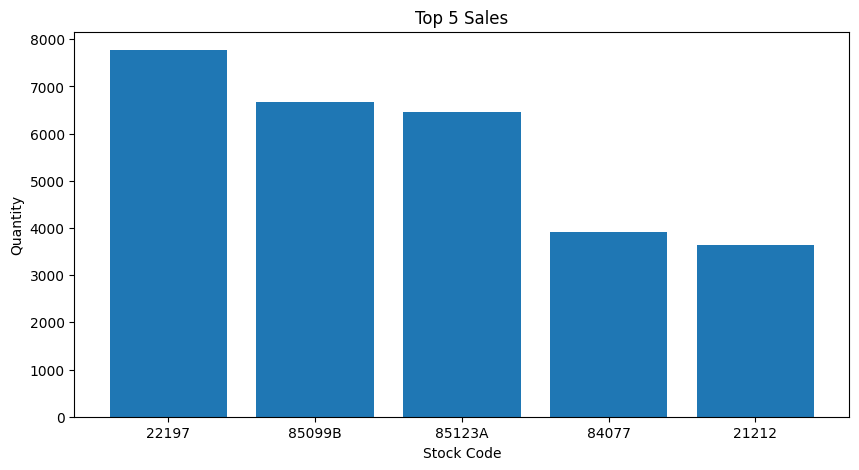

In [34]:
data_sales = data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head()
print(data_sales)

plt.figure(figsize=(10, 5))
plt.bar(data_sales.index, data_sales.values)
plt.xlabel('Stock Code')
plt.ylabel('Quantity')
plt.title('Top 5 Sales')
plt.show()